## **Libraries**

In [0]:
from google.colab import drive, files 
import multiprocessing
from gensim.models import Word2Vec, FastText
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
% matplotlib inline
from sklearn.decomposition import PCA
from gensim.models.keyedvectors import KeyedVectors

In [4]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## **Loading Models**

**Loading Word2Vec**

In [11]:
word2vec_sg = Word2Vec.load('/content/drive/My Drive/Models/Word2Vec/Ours/word2vec_roman_sg_500')
word2vec_cbow = Word2Vec.load('/content/drive/My Drive/Models/Word2Vec/Ours/word2vec_roman_cbow_500')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


**Loading GloVe**

In [10]:
glove_link = '/content/drive/My Drive/Models/GloVe/glove_roman_500.txt'
glove = KeyedVectors.load_word2vec_format(glove_link, binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


**Loading FastText**

In [12]:
fasttext_sg = FastText.load('/content/drive/My Drive/Models/fastText/roman_cbow/fasttext_roman_cbow_500')
fasttext_cbow = FastText.load('/content/drive/My Drive/Models/fastText/roman_sg/fasttext_roman_sg_500')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# **Display PCA Plots**

**Functions**

In [0]:
#https://web.stanford.edu/class/cs224n/materials/Gensim%20word%20vector%20visualization.html
#https://raw.githubusercontent.com/devmount/GermanWordEmbeddings/master/visualize.py

def display_pca_scatterplot(model, words, filename='', title=''):        
    word_vectors = [model[w] for w in words]
    pca = PCA(n_components=2)
    twodim = pca.fit_transform(word_vectors)
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle(title, fontsize=20)
    plt.scatter(twodim[:,0], twodim[:,1], c='g')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    
    # plotting arrows
    for i in range(0, len(words)-1, 2):
        a = twodim[i][0] + 0.04
        b = twodim[i][1]
        c = twodim[i+1][0] - 0.04
        d = twodim[i+1][1]
        plt.arrow(
            a, b, c-a, d-b,
            shape='full',
            lw=0.1,
            edgecolor='#bbbbbb',
            facecolor='#bbbbbb',
            length_includes_head=True,
            head_width=0.08,
            width=0.01
        )
    
    #plt.savefig(filename, format='png', dpi=300, bbox_inches='tight')

**Word Lists**

In [0]:
countries = ['pakistan', 'islamabad', 'england', 'london', 'afghanistan', 'kabul', 'japan', 'tokyo', 'iraq','bghdad']
synonyms = ['hans', 'muskura', 'dilkash', 'khoobsurat', 'khuda', 'parvardigaar']
antonyms = ['hansna', 'rona', 'baithna', 'chalna', 'shaam', 'subha']
sing_plu = ['beta', 'betay', 'beti', 'betiyan']

**Word2Vec Plots**

Countries

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


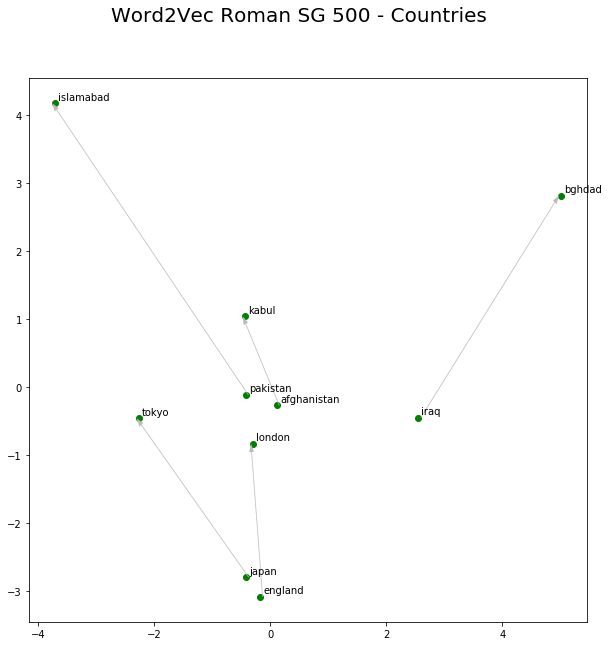

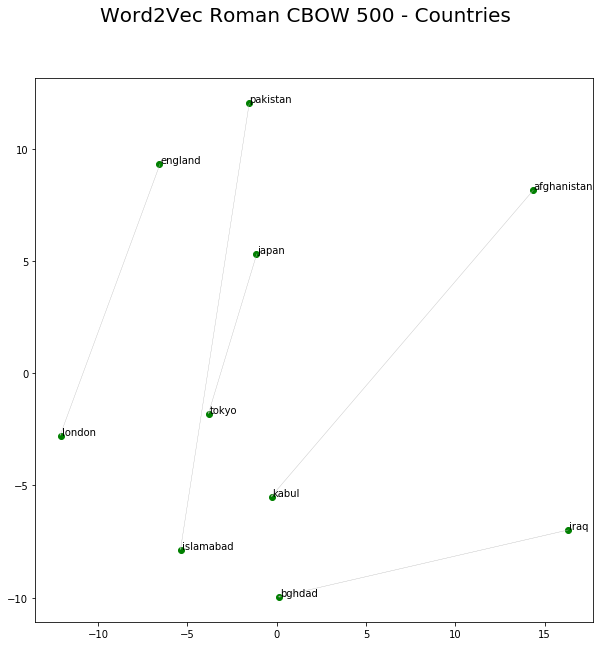

In [21]:
display_pca_scatterplot(word2vec_sg, countries, 'word2vec_roman_sg_500_countries','Word2Vec Roman SG 500 - Countries')
display_pca_scatterplot(word2vec_cbow, countries, 'word2vec_roman_cbow_500_countries','Word2Vec Roman CBOW 500 - Countries')

Synonyms

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


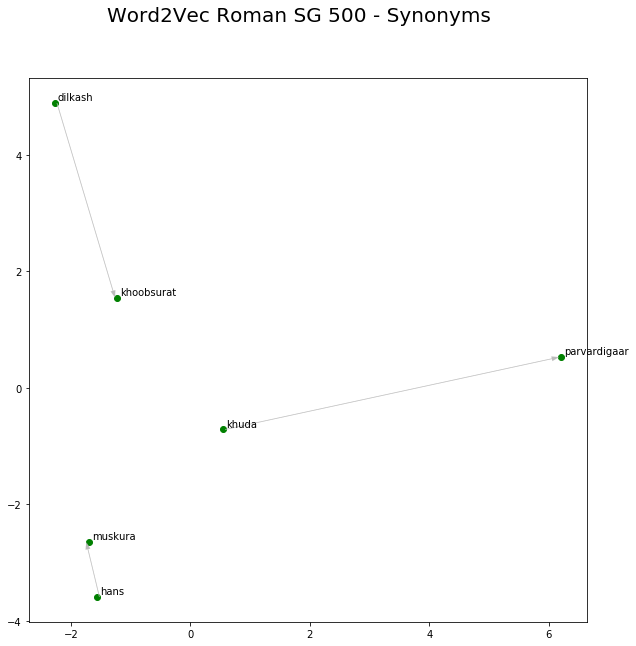

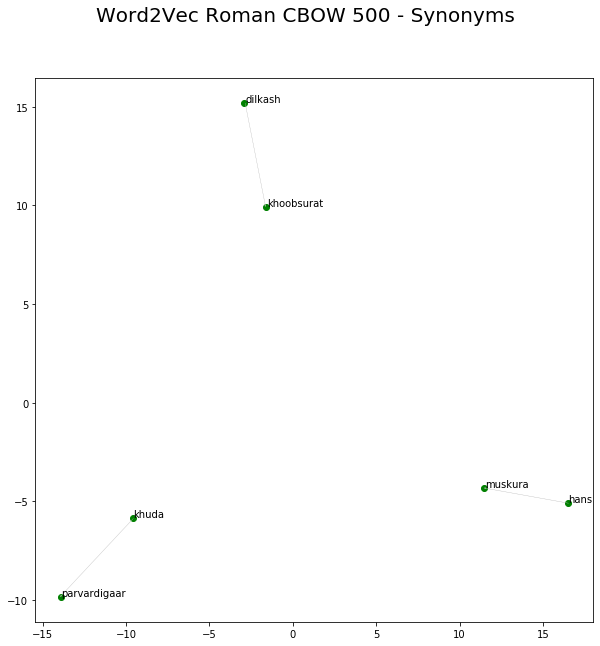

In [23]:
display_pca_scatterplot(word2vec_sg, synonyms, 'word2vec_roman_sg_500_synonyms','Word2Vec Roman SG 500 - Synonyms')
display_pca_scatterplot(word2vec_cbow, synonyms, 'word2vec_roman_cbow_500_synonyms','Word2Vec Roman CBOW 500 - Synonyms')

**GloVe Plots**

Countries

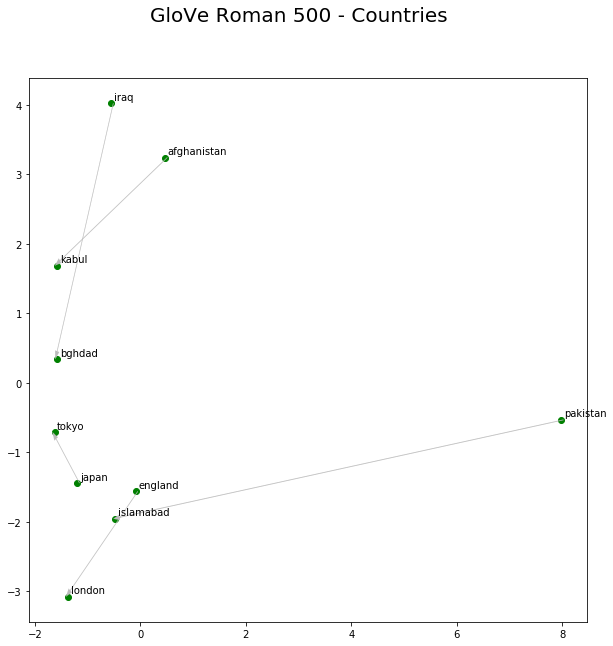

In [24]:
display_pca_scatterplot(glove, countries, 'glove_roman_sg_500_countries','GloVe Roman 500 - Countries')

Synonyms

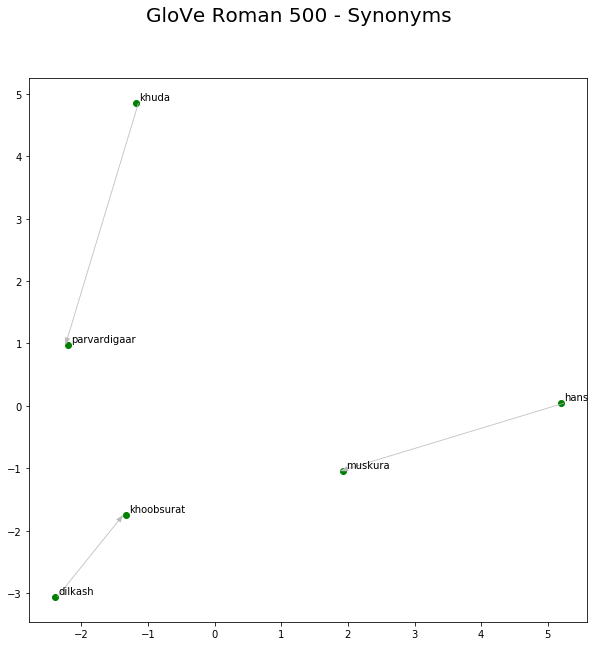

In [25]:
display_pca_scatterplot(glove, synonyms, 'glove_roman_sg_500_synonyms','GloVe Roman 500 - Synonyms')

**FastText Plots**

Countries

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


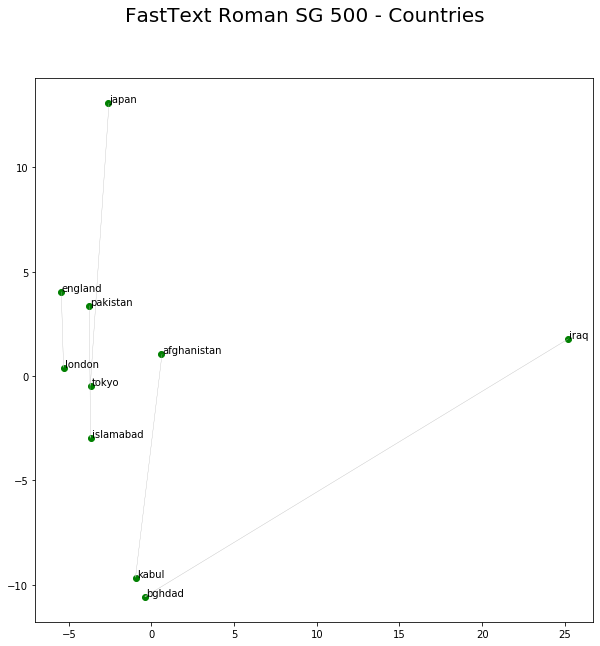

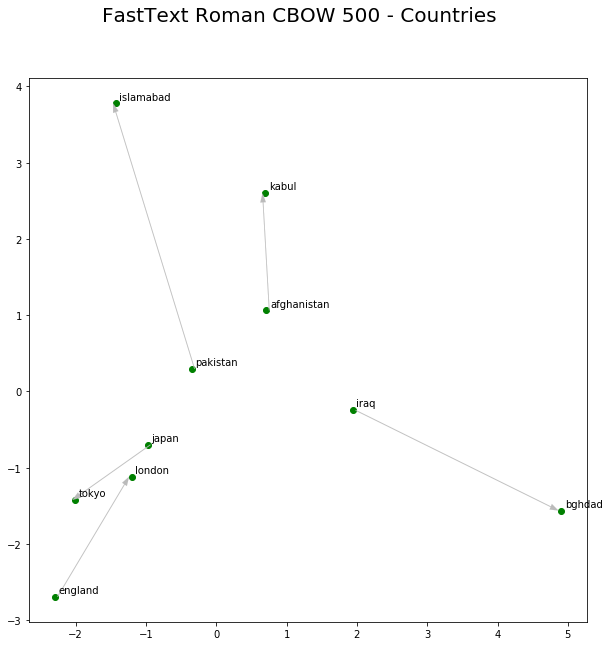

In [26]:
display_pca_scatterplot(fasttext_sg, countries, 'fasttext_roman_sg_500_countries','FastText Roman SG 500 - Countries')
display_pca_scatterplot(fasttext_cbow, countries, 'fasttext_roman_cbow_500_countries','FastText Roman CBOW 500 - Countries')

Synonyms

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


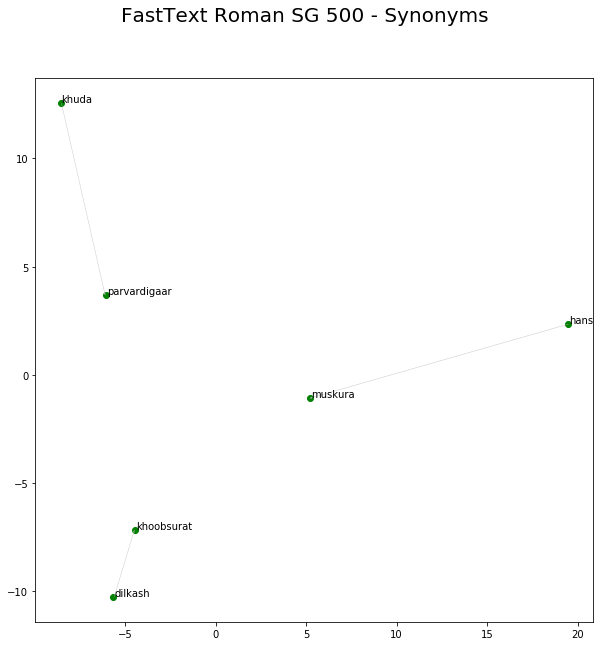

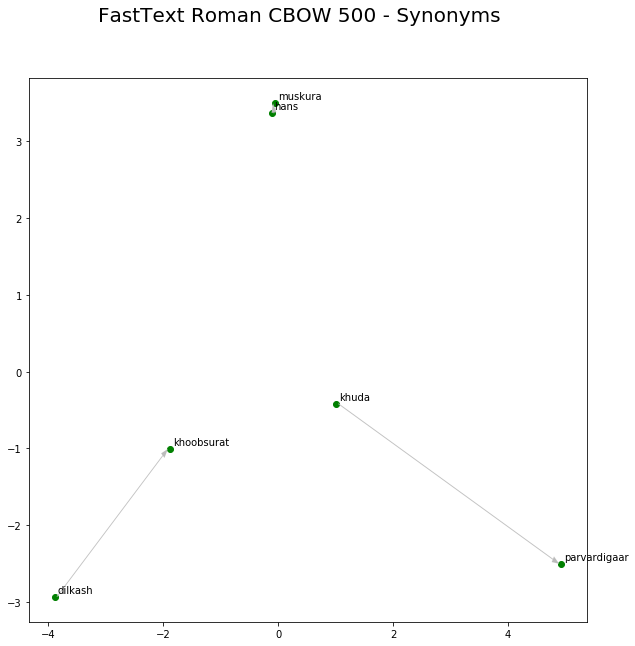

In [27]:
display_pca_scatterplot(fasttext_sg, synonyms, 'fasttext_roman_sg_500_synonyms','FastText Roman SG 500 - Synonyms')
display_pca_scatterplot(fasttext_cbow, synonyms, 'fasttext_roman_cbow_500_synonyms','FastText Roman CBOW 500 - Synonyms')

# **Display TSNE Scatter Plots**

**Functions**

In [0]:
#https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d

def build_clusters(model, words, perp):
    embedding_clusters = []
    word_clusters = []
    for word in words:
        embeddings = []
        words = []
        for similar_word, _ in model.most_similar(word, topn=10):
            words.append(similar_word)
            embeddings.append(model[similar_word])
        embedding_clusters.append(embeddings)
        word_clusters.append(words)

    embedding_clusters = np.array(embedding_clusters)
    n, m, k = embedding_clusters.shape
    tsne_model_en_2d = TSNE(perplexity=perp, n_components=2, init='pca', n_iter=5000)
    embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

    return embeddings_en_2d, word_clusters


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, filename):
    fig = plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=0.7, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    fig.suptitle(title, fontsize=20)
    plt.grid(True)
    #plt.savefig(filename, format='png', dpi=300, bbox_inches='tight')
    plt.show()

def gen_plot(model, words, title='', filename='', perp = 35):
    embeddings_en_2d, word_clusters = build_clusters(model, words, perp)
    tsne_plot_similar_words(title, words, embeddings_en_2d, word_clusters, filename)

**Words**

In [0]:
words = ['mazhab', 'khana', 'mausam', 'mohabbat', 'pakistan', 'allah', 'maalik',
         'hukoomat', 'shehar', 'mohammad', 'cricket', 'musalman', 'america', 'baap', 'subha']

**Word2Vec Plots**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c'

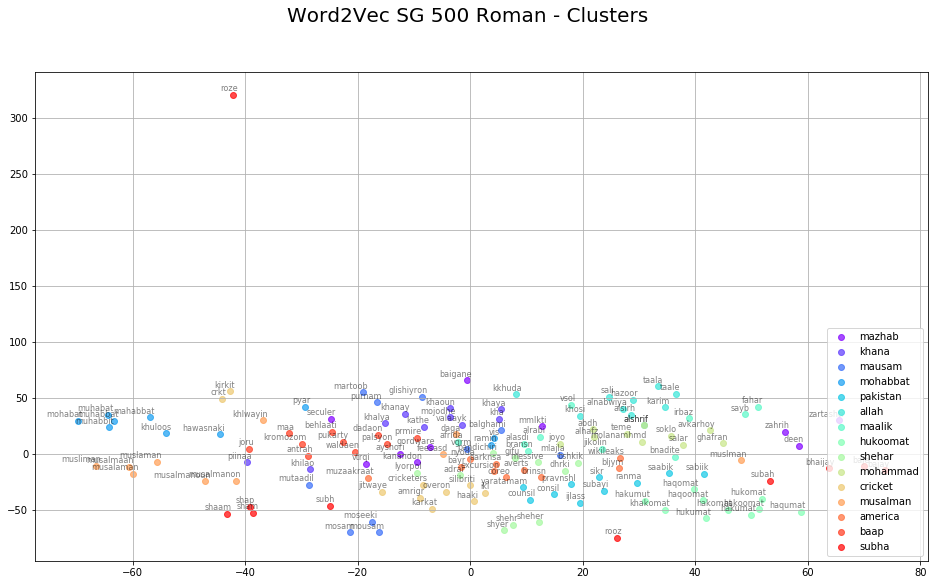

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c'

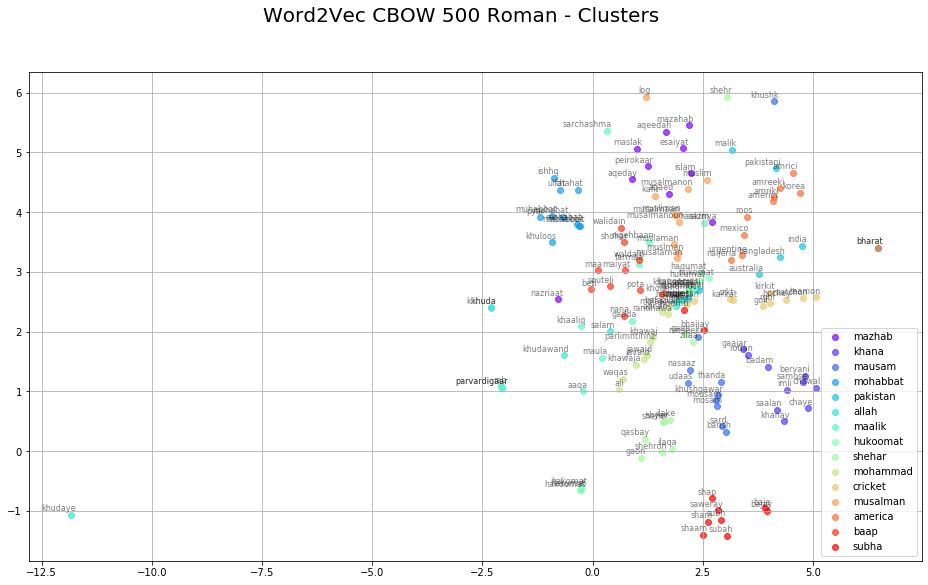

In [42]:
gen_plot(word2vec_sg, words, 'Word2Vec SG 500 Roman - Clusters', 'word2vec_roman_sg_500_clusters')
gen_plot(word2vec_cbow, words, 'Word2Vec CBOW 500 Roman - Clusters', 'word2vec_roman_cbow_500_clusters', 39)

**GloVe Plots**

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches wi

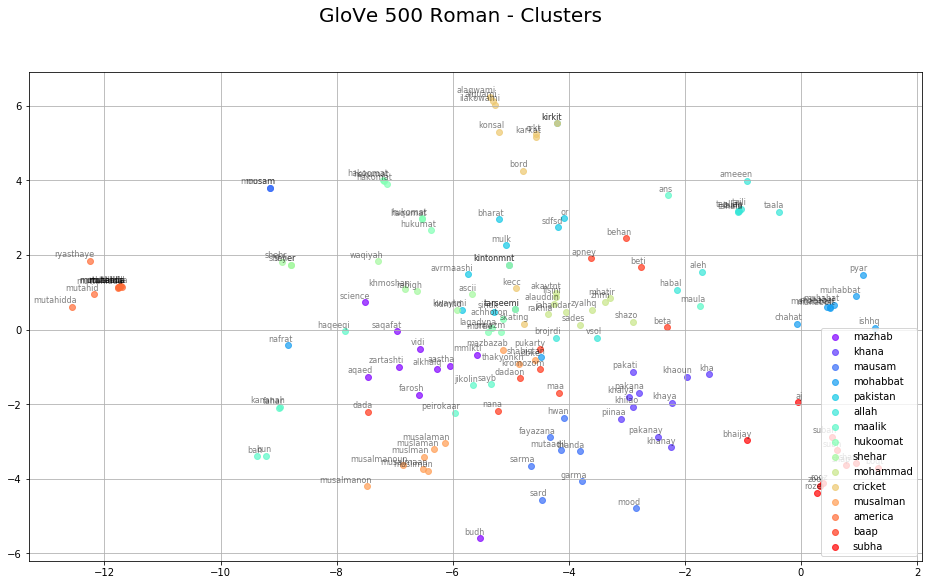

In [41]:
gen_plot(glove, words, 'GloVe 500 Roman - Clusters', 'glove_roman_500_clusters')

**FastText Plots**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c'

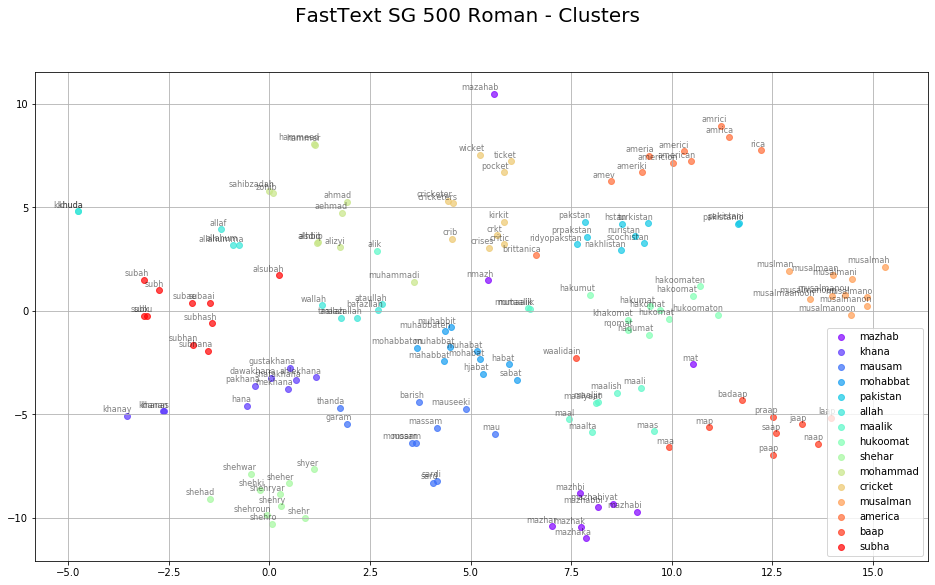

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c'

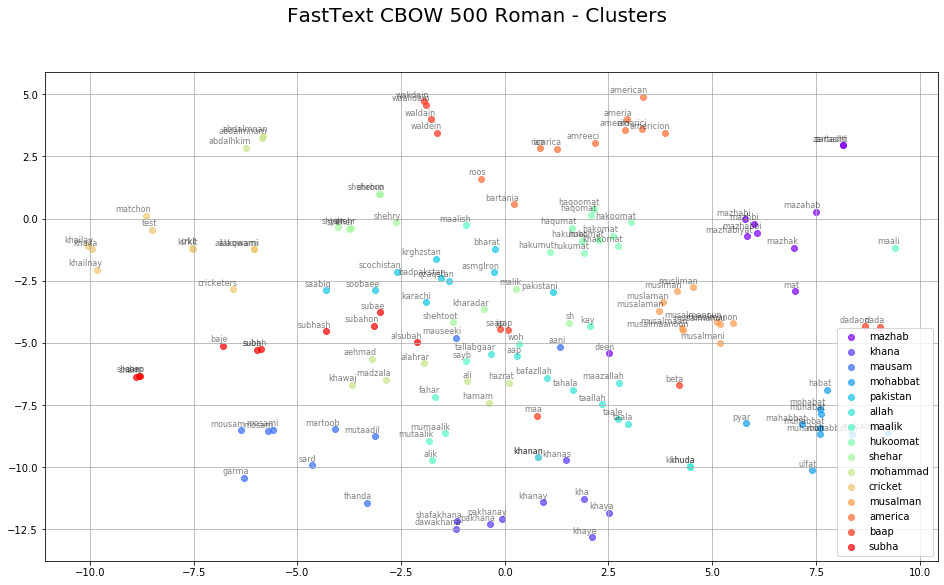

In [43]:
gen_plot(fasttext_sg, words, 'FastText SG 500 Roman - Clusters', 'fasttext_roman_sg_500_clusters')
gen_plot(fasttext_cbow, words, 'FastText CBOW 500 Roman - Clusters', 'fasttext_roman_cbow_500_clusters')

## **Quantitative Analysis using Spearman's Correlation**

**Loading Benchmarks to Dataframes**

In [0]:
simlex_file = '/content/drive/My Drive/Data/Evaluation-Datasets/SimLex-999_urdu.txt'
wordsim_file = '/content/drive/My Drive/Data/Evaluation-Datasets/wordsim353_agreed_urdu.txt'

ws_df = pd.read_csv(wordsim_file, sep='\t', header=None)
sl_df =  pd.read_csv(simlex_file, sep='\t', header=None)

# **Playground**